In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [11]:
#Generating group A with random values - marker : *
def generate_random_pointsA(min_x, max_x, min_y, max_y, points_count):
    x = np.random.randint(min_x, max_x, points_count)
    y = np.random.randint(min_y, max_y, points_count)
    pointsA = pd.DataFrame({
        'x':x,
        'y':y
    })
    return pointsA

#Generating group B with random values - marker : o
def generate_random_pointsB(min_x, max_x, min_y, max_y, points_count):
    x = np.random.randint(min_x, max_x, points_count)
    y = np.random.randint(min_y, max_y, points_count)
    pointsB = pd.DataFrame({
        'x':x,
        'y':y
    })
    return pointsB

#Generating a single random point - marker : ^ 
def generate_new_random_point(min_x,max_x, min_y, max_y,point_count):
    x = np.random.randint(min_x, max_x,point_count)
    y = np.random.randint(min_y, max_y,point_count)
    newPoint = pd.DataFrame({
        'x':x,
        'y':y
    })
    return newPoint

pointsA = generate_random_pointsA(-20,25,-50,50, 200)
pointsB = generate_random_pointsA(15,60,-50,50, 200)

newPoint = generate_new_random_point(-20,60,-50,50,1)



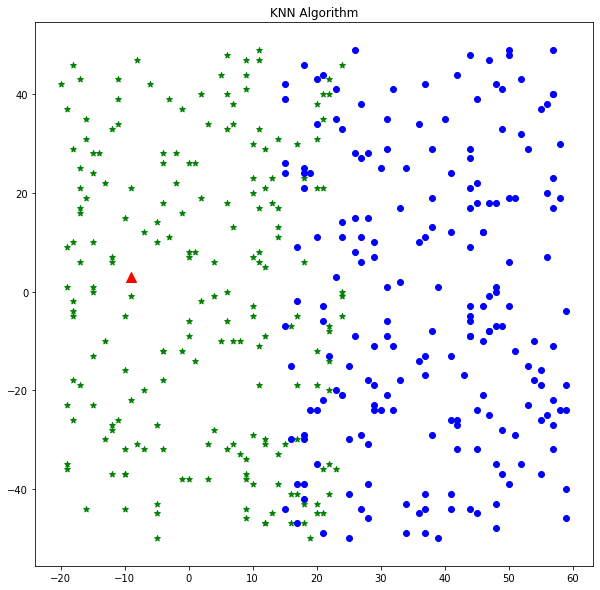

In [12]:

fig = plt.figure(figsize=(10,10))
plt.title('KNN Algorithm')
plt.scatter(pointsA['x'], pointsA['y'] , c = "g" , marker = '*')
plt.scatter(pointsB['x'], pointsB['y'] , c = "b" , marker = 'o')
plt.scatter(newPoint['x'], newPoint['y'], c ='r' , marker='^', s =100)

plt.show()

In [13]:
pointsA['class'] = 'A'
pointsB['class'] = 'B'

k = 8
def euclidean_distance(pointsA, pointsB, newPoint, k):
    points_merged = pd.concat([pointsA, pointsB], ignore_index=True, sort =False)
    dist_result = []
    NewPointx = newPoint['x']
    NewPointy = newPoint['y']

    for index, row in points_merged.iterrows(): 
        dist_result.append([row['x'], 
                            row['y'],
                            row['class'],
                            math.sqrt((row['x'] - NewPointx)**2 + (row['y'] - NewPointy)**2 )
                           ])
    dist_result = sorted(dist_result,key=lambda x: x[3]) 
    dist_result = dist_result[:k] 
    neighbours = pd.DataFrame(dist_result, columns =['x', 'y','class','distance'])
    neighboursClass = neighbours.loc[:,'class']
    return neighboursClass
    

-- Class of the new point is A and shape of new point has changed.--


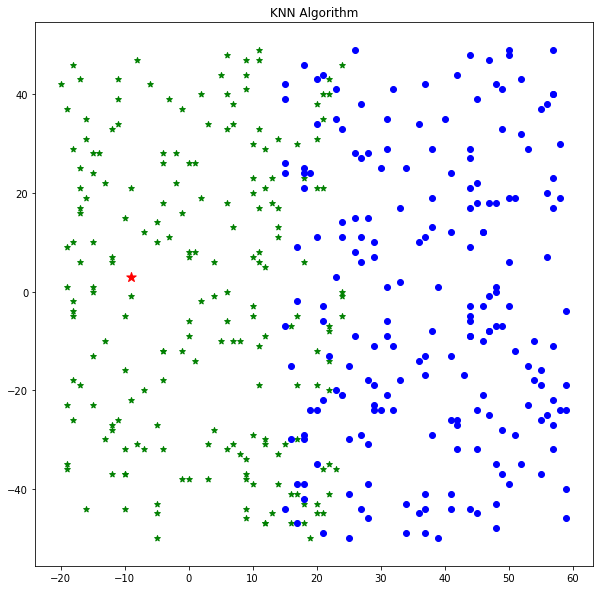

In [14]:
neighboursClass = euclidean_distance(pointsA, pointsB, newPoint, k)
countA = 0
countB = 0
for cl in neighboursClass:
    if 'A' in cl:
        countA +=1
    else:
        countB +=1
if countA > countB:
    print('-- Class of the new point is A and shape of new point has changed.--')
    fig = plt.figure(figsize=(10,10))
    plt.title('KNN Algorithm')
    plt.scatter(pointsA['x'], pointsA['y'] , c = "g" , marker = '*')
    plt.scatter(pointsB['x'], pointsB['y'] , c = "b")
    plt.scatter(newPoint['x'], newPoint['y'], c ='r' , marker='*', s =100)
    plt.show()
else:
    print('--Class of the new point is B and shape of new point has changed.--')
    fig = plt.figure(figsize=(10,10))
    plt.title('KNN Algorithm')
    plt.scatter(pointsA['x'], pointsA['y'] , c = "g" , marker = '*')
    plt.scatter(pointsB['x'], pointsB['y'] , c = "b")
    plt.scatter(newPoint['x'], newPoint['y'], c ='r' , marker='o', s =100)
    plt.show()
